In [2]:
import talib as ta
import yfinance as yf
%config InlineBackend.figure_format='retina'
from lib.visualize import *

# Some common tickers:

### Cryptocurrencies
- Bitcoin: `BTC-USD`
- Ethereum: `ETH-USD`
- Avalanche (AVAX): `AVAX-USD`
- Binance Coin: `BNB-USD`
- Cardano: `ADA-USD`
- Solana: `SOL-USD`
- Ripple: `XRP-USD`
- Polkadot: `DOT-USD`
- Litecoin: `LTC-USD`
- Chainlink: `LINK-USD`
- Dogecoin: `DOGE-USD`
- Shiba Inu: `SHIB-USD`

### Commodities
- Crude Oil: `CL=F`
- Gold: `GC=F`
- Silver: `SI=F`
- Natural Gas: `NG=F`
- Copper: `HG=F`
- Corn: `C=F`
- Wheat: `W=F`
- Soybeans: `S=F`
- Coffee: `KC=F`
- Sugar: `SB=F`
- Cocoa: `CC=F`
- Cotton: `CT=F`
- Live Cattle: `LE=F`
- Feeder Cattle: `GF=F`
- Lean Hogs: `HE=F`

### Stock Assets
- Apple: `AAPL`
- Microsoft: `MSFT`
- Amazon: `AMZN`
- Google (Alphabet): `GOOGL`
- Tesla: `TSLA`
- Facebook (Meta Platforms): `META`
- Netflix: `NFLX`
- Berkshire Hathaway: `BRK-B`
- Johnson & Johnson: `JNJ`
- Visa: `V`
- Procter & Gamble: `PG`
- Nvidia: `NVDA`
- Walt Disney: `DIS`
- PayPal: `PYPL`
- Adobe: `ADBE`

## Download historical data

In [5]:
ticker = 'BTC-USD'
start_date = '2020-01-01'
end_date = '2024-01-01'

df = yf.download(ticker, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095


# Calculate indicators

**Explanation of Indicators:**
- **SMA (Simple Moving Average)**: Averages the closing prices over a specified period.
- **EMA (Exponential Moving Average)**: Similar to SMA but gives more weight to recent prices.
- **RSI (Relative Strength Index)**: Measures the speed and change of price movements, typically used to identify overbought or oversold conditions.
- **MACD (Moving Average Convergence Divergence)**: Shows the relationship between two moving averages of a security’s price.
- **Bollinger Bands**: Consists of a middle band (SMA) and two outer bands (standard deviations away from the SMA), used to identify volatility and overbought/oversold conditions.
- **Average True Range (ATR)**: Measures market volatility.
- **Stochastic Oscillator (STOCH)**: Indicates overbought or oversold conditions.
- **Commodity Channel Index (CCI)**: Measures the deviation of the price from its average.
- **On-Balance Volume (OBV)**: Uses volume flow to predict changes in stock price.
- **Williams %R**: A momentum indicator that measures overbought and oversold levels.
- **Momentum**: Measures the rate of change of a security's price.
- **Parabolic SAR**: Indicates potential reversals in the price direction.

In [9]:
# Indicators with values comparible to price value scale
df['SMA'] = ta.SMA(df['Close'], timeperiod=20)
df['EMA'] = ta.EMA(df['Close'], timeperiod=20)
df['SAR'] = ta.SAR(df['High'], df['Low'], acceleration=0.02, maximum=0.2)
df['Upper_BB'], df['Middle_BB'], df['Lower_BB'] = ta.BBANDS(df['Close'], timeperiod=20, nbdevup=2, nbdevdn=2, matype=0)

# Indicators with values out of price value range
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)
df['ATR'] = ta.ATR(df['High'], df['Low'], df['Close'], timeperiod=14)
df['CCI'] = ta.CCI(df['High'], df['Low'], df['Close'], timeperiod=14)
df['OBV'] = ta.OBV(df['Close'], df['Volume'])
df['Williams_%R'] = ta.WILLR(df['High'], df['Low'], df['Close'], timeperiod=14)
df['Momentum'] = ta.MOM(df['Close'], timeperiod=10)

df['MACD'], df['MACD_signal'], df['MACD_hist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['STOCH_k'], df['STOCH_d'] = ta.STOCHF(df['High'], df['Low'], df['Close'], fastk_period=14, fastd_period=3)

In [11]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,EMA,SAR,Upper_BB,...,ATR,CCI,OBV,Williams_%R,Momentum,MACD,MACD_signal,MACD_hist,STOCH_k,STOCH_d
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,7194.892090,7254.330566,7174.944336,7200.174316,7200.174316,18565664997,NaN,NaN,NaN,NaN,...,NaN,NaN,1.856566e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,7202.551270,7212.155273,6935.270020,6985.470215,6985.470215,20802083465,NaN,NaN,7254.330566,NaN,...,NaN,NaN,-2.236418e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,6984.428711,7413.715332,6914.996094,7344.884277,7344.884277,28111481032,NaN,NaN,6914.996094,NaN,...,NaN,NaN,2.587506e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-04,7345.375488,7427.385742,7309.514160,7410.656738,7410.656738,18444271275,NaN,NaN,6914.996094,NaN,...,NaN,NaN,4.431933e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-05,7410.451660,7544.497070,7400.535645,7411.317383,7411.317383,19725074095,NaN,NaN,6914.996094,NaN,...,NaN,NaN,6.404441e+10,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Visiualize charts

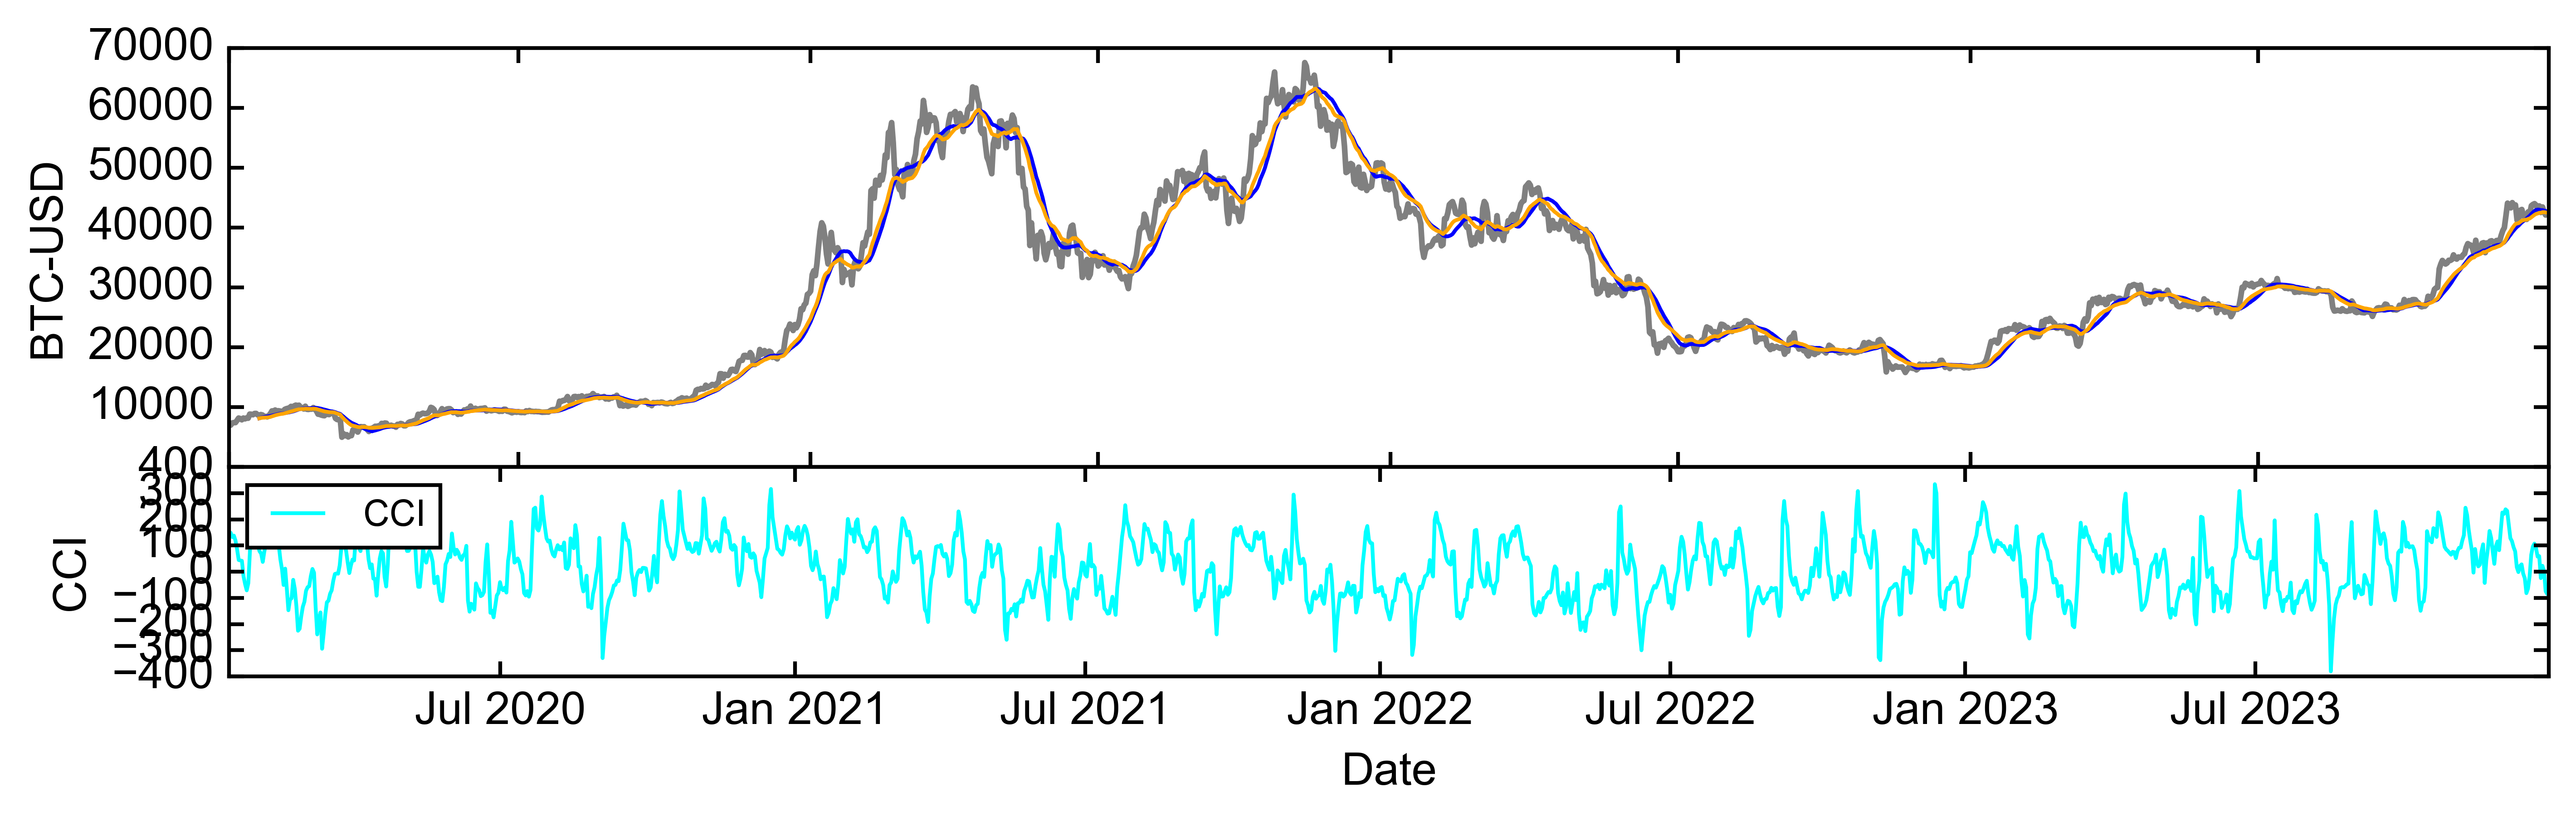

In [11]:
plot = indicator_plot(ticker = ticker,
                      price = 'Close',
                      indicators = ['SMA', 'EMA', 'CCI'],
                      data_frame = df,
                      volume_chart = False,
                      interactive = False, inline = True,
                      fig_width = 1100, fig_height = 500)

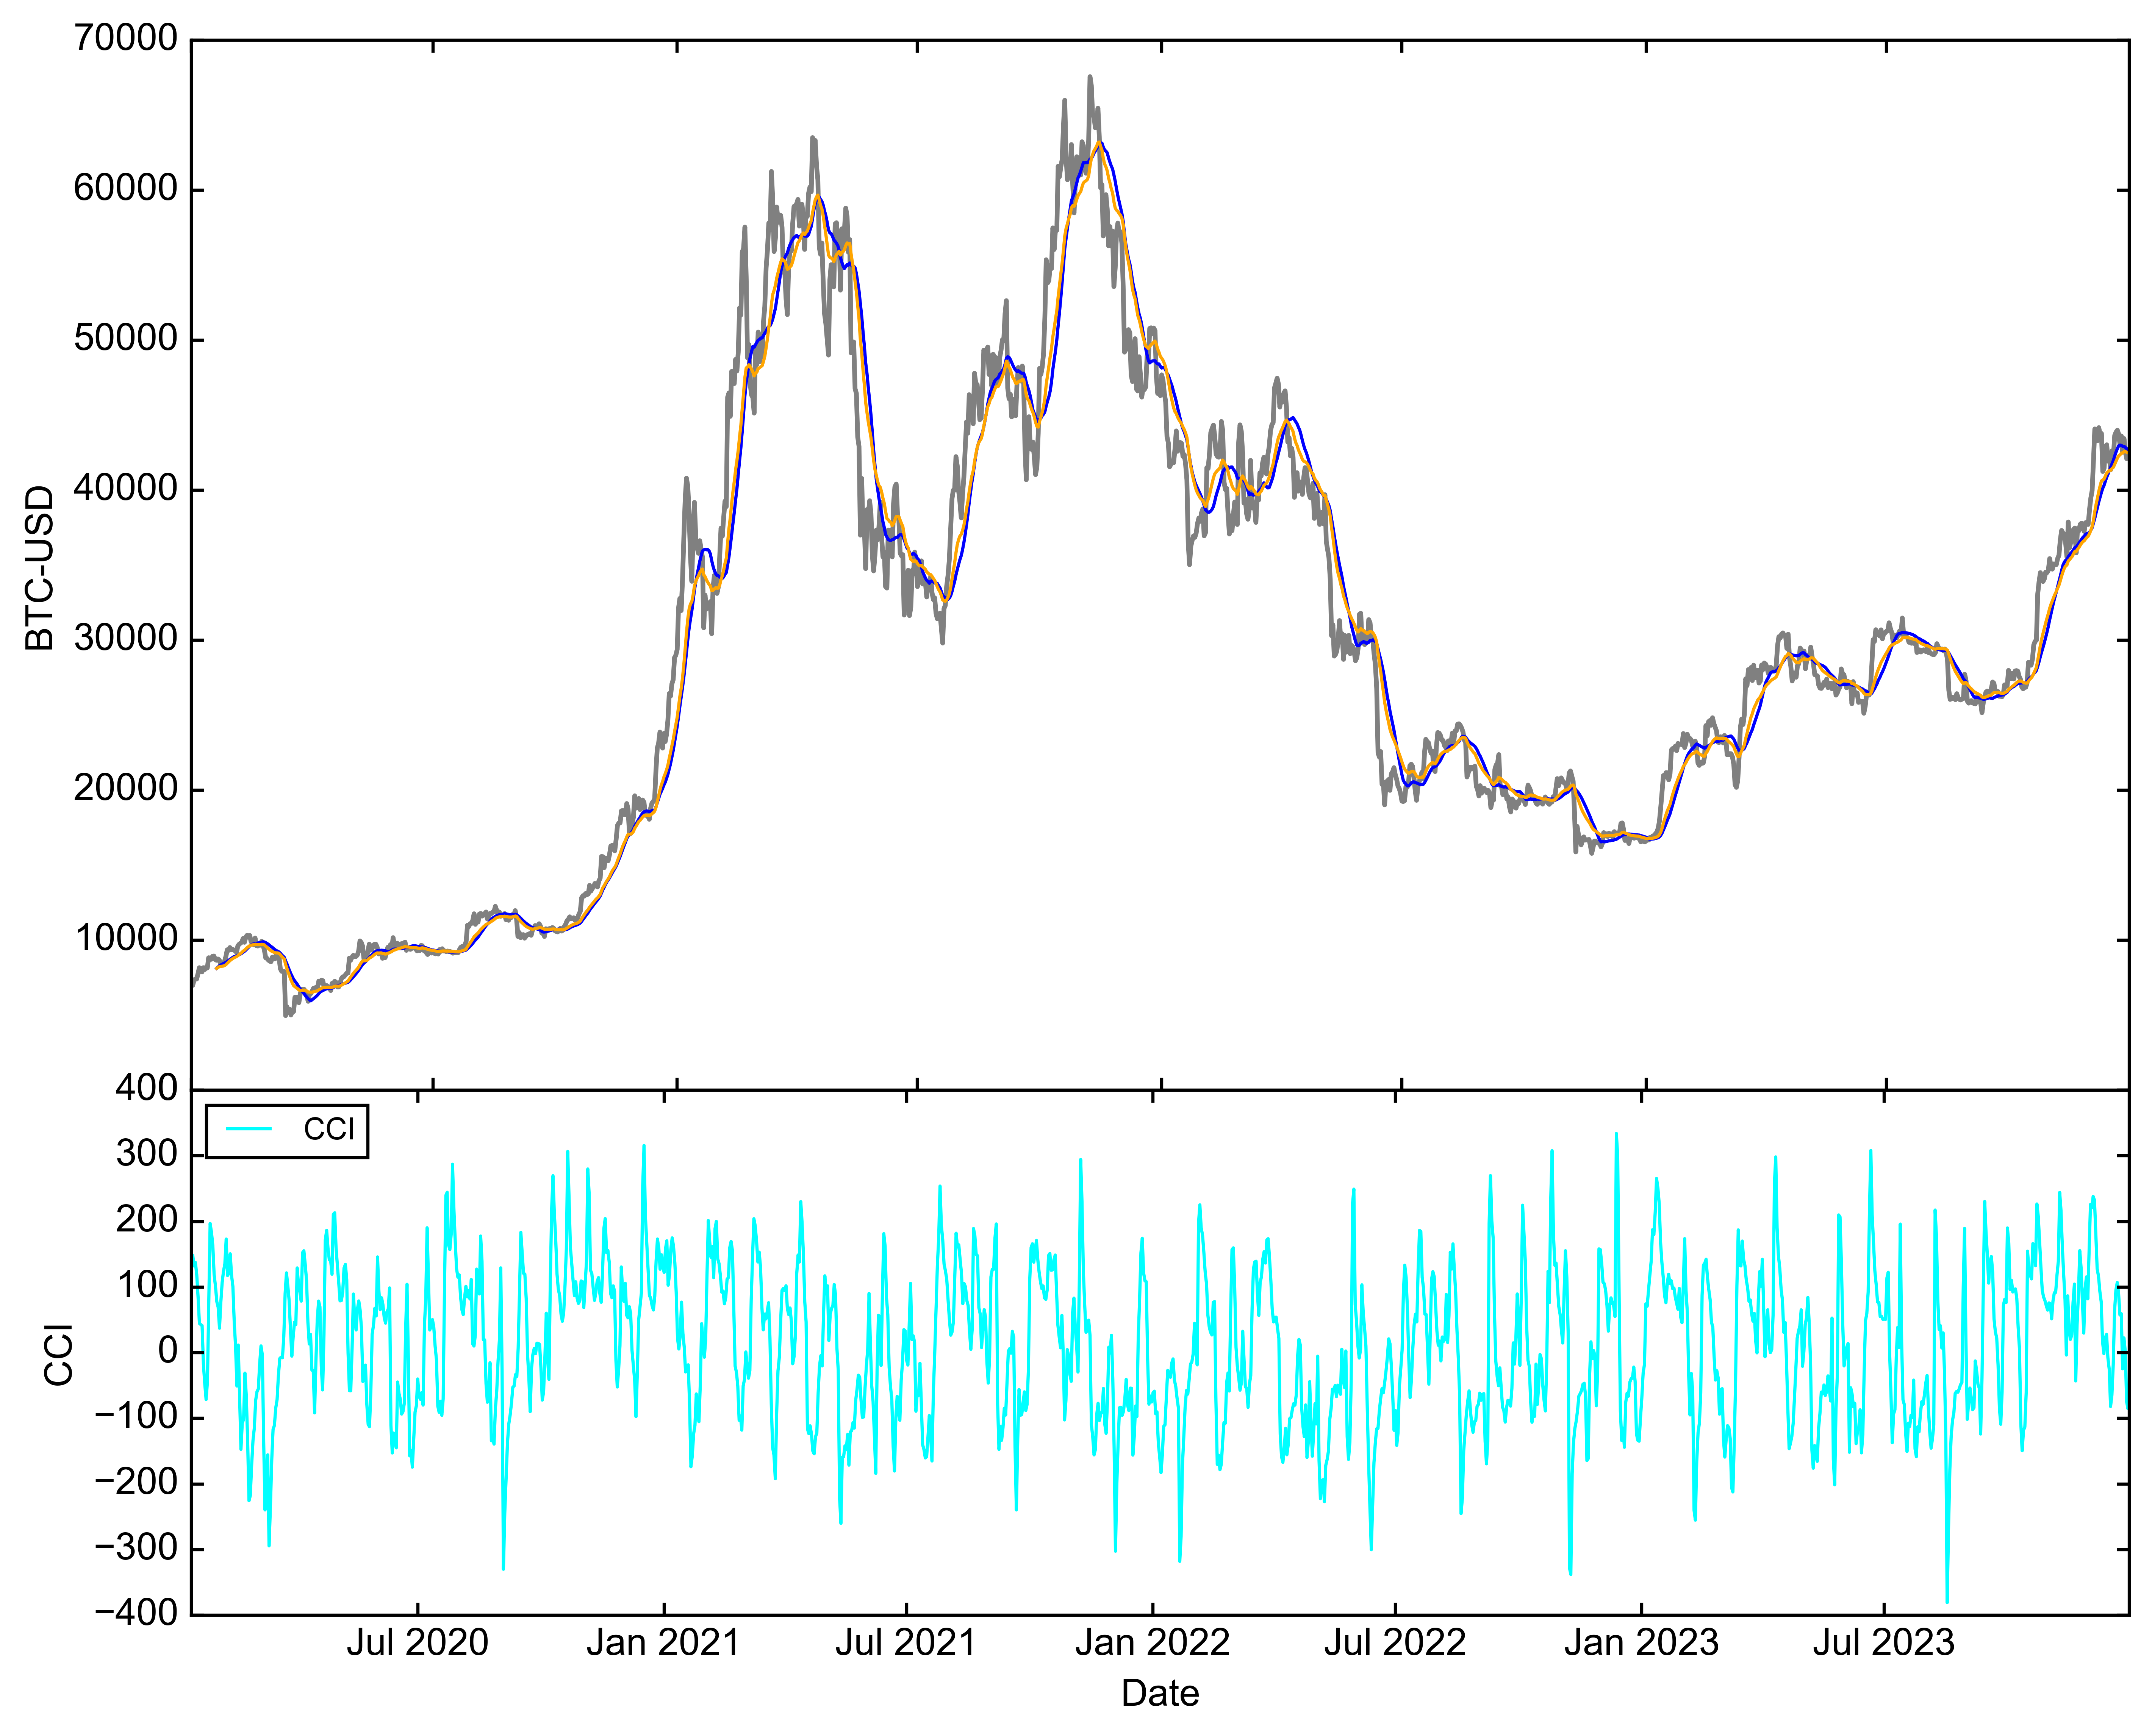

In [13]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%config InlineBackend.figure_format='retina'

ticker = ticker
price = 'Close'
indicators = ['SMA', 'EMA', 'CCI']
data_frame = df
volume_chart = False
interactive = False
inline = True
fig_width = 1100
fig_height = 500

